In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

In [2]:
data=pd.read_csv("empl.csv")
data.head()

,SNo,Name,Age,City,Country,Salary
0,1,Tom,28.0,Toronto,Canada,20000.0
1,2,Lee,31.0,Edmonto,Canada,3900.0
2,3,Dave,34.0,Toronto,Canada,8000.0
3,4,Anik,26.0,HongKong,Asia,66672.0
4,5,kamal,30.0,NaN,America,NaN


In [3]:
data.describe()

,SNo,Age,Salary
count,22.000000,19.000000,19.000000
mean,12.090909,32.421053,33739.947368
std,6.927578,7.174924,23151.188084
min,1.000000,22.000000,3900.000000
25%,6.250000,27.000000,8888.000000
50%,12.500000,31.000000,33451.000000
75%,17.750000,36.000000,54666.000000
max,23.000000,50.000000,67666.000000


In [4]:
data.isnull().sum()

SNo        0
Name       0
Age        3
City       3
Country    0
Salary     3
dtype: int64

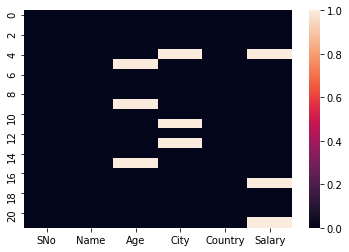

In [5]:
sns.heatmap(data.isnull())

In [6]:
Age_mean=data["Age"].mean()
Age_mean

32.421052631578945

In [7]:
data["Age"]=data["Age"].fillna(value=Age_mean)

In [8]:
Salary_mean=data["Salary"].mean()
Salary_mean

33739.94736842105

In [9]:
data["Salary"]=data["Salary"].fillna(value=Salary_mean)

In [10]:
data=data.drop(["SNo"],axis=1)

In [11]:
data=data.drop('Name',axis=1)

In [12]:
from sklearn.impute import SimpleImputer
imp=SimpleImputer(strategy="most_frequent")
data["City"]=imp.fit_transform(data["City"].values.reshape(-1,1))
data

,Age,City,Country,Salary
0,28.000000,Toronto,Canada,20000.000000
1,31.000000,Edmonto,Canada,3900.000000
2,34.000000,Toronto,Canada,8000.000000
3,26.000000,HongKong,Asia,66672.000000
4,30.000000,HongKong,America,33739.947368
5,32.421053,HongKong,Asia,30007.000000
6,43.000000,BayArea,America,8300.000000
7,38.000000,Hyderabad,Asia,54666.000000
8,50.000000,newyork,America,67666.000000
9,32.421053,newyork,America,8888.000000


In [13]:
le=LabelEncoder()
le_count=0
for col in data.columns[0:]:
    if data[col].dtype=='object':
        if len(list(data[col].unique()))<=20:
            le.fit(data[col])
            data[col]=le.transform(data[col])
            le_count+=1
print('{} column were label encoded.', format(le_count))

{} column were label encoded. 2


In [14]:
data.head()

,Age,City,Country,Salary
0,28.0,8,3,20000.000000
1,31.0,3,3,3900.000000
2,34.0,8,3,8000.000000
3,26.0,5,2,66672.000000
4,30.0,5,1,33739.947368


In [15]:
data.corr()

,Age,City,Country,Salary
Age,1.000000,0.020797,-0.378421,0.035447
City,0.020797,1.000000,0.154134,0.129000
Country,-0.378421,0.154134,1.000000,-0.079428
Salary,0.035447,0.129000,-0.079428,1.000000


EDA

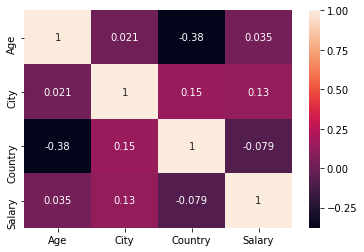

In [16]:
sns.heatmap(data.corr(),annot=True)

In [17]:
data.isnull().sum()

Age        0
City       0
Country    0
Salary     0
dtype: int64

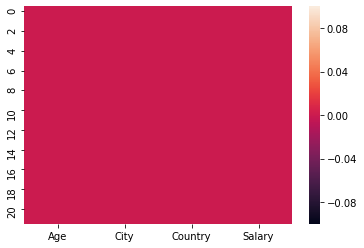

In [18]:
sns.heatmap(data.isnull())

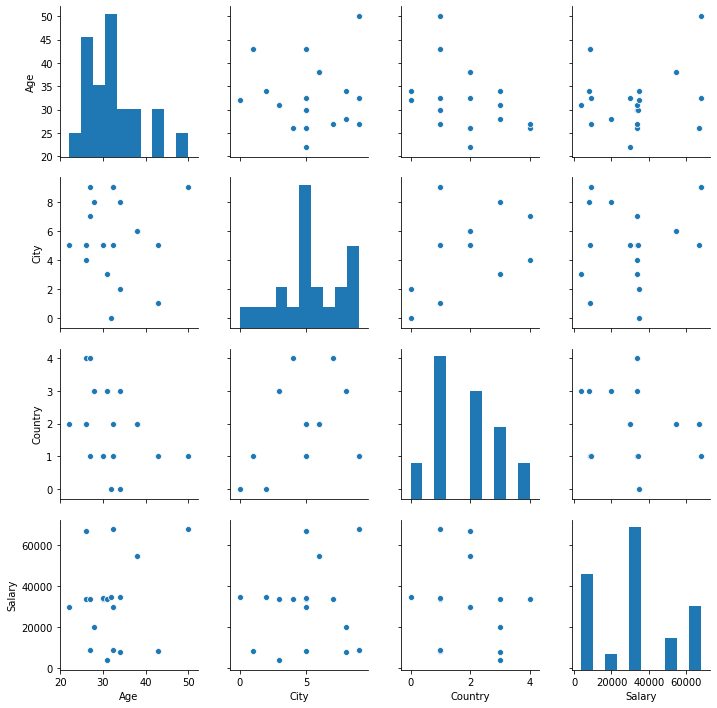

In [19]:
sns.pairplot(data)

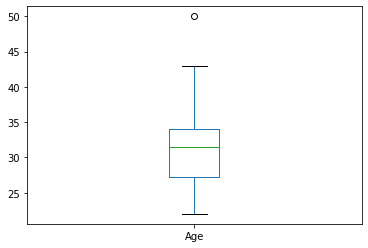

In [20]:
#Checking the Outliers
data['Age'].plot.box()

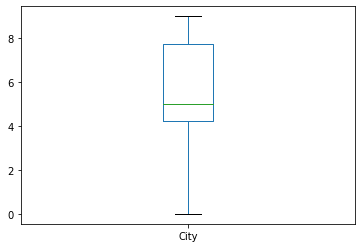

In [21]:
data['City'].plot.box()

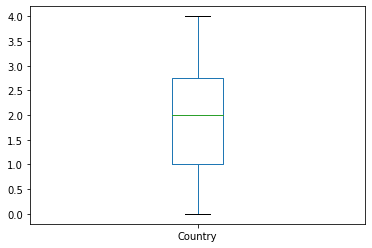

In [22]:
data['Country'].plot.box()

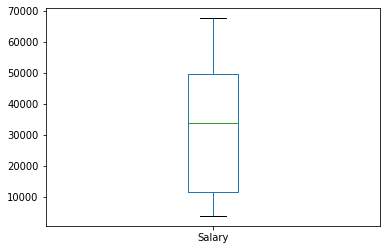

In [23]:
data['Salary'].plot.box()

In [24]:
#Normalizing the data
from sklearn.preprocessing import normalize
data=normalize(data)
data=pd.DataFrame(data)
data.head()

,0,1,2,3
0,0.001400,0.000400,0.000150,0.999999
1,0.007948,0.000769,0.000769,0.999968
2,0.004250,0.001000,0.000375,0.999990
3,0.000390,0.000075,0.000030,1.000000
4,0.000889,0.000148,0.000030,1.000000


In [25]:
x=data.drop(3,axis=1)
x.head()

,0,1,2
0,0.001400,0.000400,0.000150
1,0.007948,0.000769,0.000769
2,0.004250,0.001000,0.000375
3,0.000390,0.000075,0.000030
4,0.000889,0.000148,0.000030


In [26]:
y=data[3]
y.head()

0    0.999999
1    0.999968
2    0.999990
3    1.000000
4    1.000000
Name: 3, dtype: float64

In [27]:
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.21,random_state=42)

In [28]:
#USing DecisionTree
max_r_score=0
for r_state in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=r_state)
    lm=LinearRegression()
    lm.fit(x_train,y_train)
    predlm=lm.predict(x_test)
    r2_scr=r2_score(y_test,predlm)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print('max r2 score corresponding to',final_r_state,"is",max_r_score) 

max r2 score corresponding to 41 is 0.9840420635641306


In [29]:
lm=LinearRegression()

In [30]:
lm.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [31]:
lm.score(x_train,y_train)

0.992026286885405

In [32]:
pred=lm.predict(x_test)
pred

array([0.99999853, 1.00000009, 0.99998739, 1.00000107, 0.99998359])

In [33]:
predlm=lm.predict(x_test)
print(r2_score(y_test,predlm))

0.8717078370408253


In [34]:
data=pd.DataFrame({"Actual":y_test,"Predicted":pred})
data

,Actual,Predicted
17,1.000000,0.999999
14,1.000000,1.000000
2,0.999990,0.999987
10,1.000000,1.000001
6,0.999987,0.999984


In [35]:
print("Mean Absolute Error:", metrics.mean_absolute_error(y_test,pred))
print("Mean Squared Error:", metrics.mean_squared_error(y_test,pred))
print("Root Mean Squared Error:", np.sqrt(metrics.mean_squared_error(y_test,pred)))

Mean Absolute Error: 1.7061004922602762e-06
Mean Squared Error: 4.0975060322858025e-12
Root Mean Squared Error: 2.0242297380203175e-06


In [36]:
#Saving the Model
from sklearn.externals import joblib
joblib.dump(lm,'project4_EMPL.pkl')

C:\Users\Karan\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


['project4_EMPL.pkl']